In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('F:\jupyter\\titanic.csv')

In [26]:
#here there is a huge difference in mean min and max values of both
#we need to standarize these all values
titanic_data=df[['Age','Fare','Pclass']]
titanic_data.describe()

,Age,Fare,Pclass
count,332.000000,417.000000,418.000000
mean,30.272590,35.627188,2.265550
std,14.181209,55.907576,0.841838
min,0.170000,0.000000,1.000000
25%,21.000000,7.895800,1.000000
50%,27.000000,14.454200,3.000000
75%,39.000000,31.500000,3.000000
max,76.000000,512.329200,3.000000


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(titanic_data)
titanic_data_scaled=scaler.transform(titanic_data)

In [35]:
titanic_data_scaled=pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()
#you can see the value have been scaled

,Age,Fare,Pclass
0,0.298549,-0.497811,0.873482
1,1.181328,-0.512660,0.873482
2,2.240662,-0.464532,-0.315819
3,-0.231118,-0.482888,0.873482
4,-0.584229,-0.417971,0.873482


<AxesSubplot:xlabel='Age', ylabel='Density'>

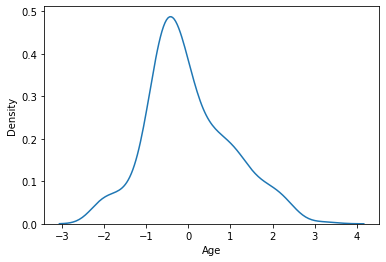

In [38]:
sns.kdeplot(titanic_data_scaled['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

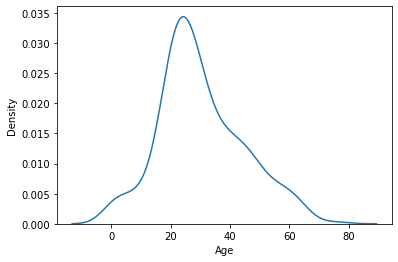

In [39]:
sns.kdeplot(df['Age'])

# Min/Max Scaling
In min/max scaling, you subtract each value by the minimum value and then divide the result by the 
difference of minimum and maximum value in the dataset. To implement the min/max scaling, you can 
use the MinMaxScaler class from the sklearn.preprocessing module. You have to pass the Pandas 
dataframe containing the dataset to the fit() method of the class and then to the transorm() method 
of the MinMaxScaler class. The following script implements min/max scaling on the age, fare, and 
pclass columns of the Titanic dataset.

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
scaler.fit(titanic_data)
scaled_data=scaler.transform(titanic_data)

In [46]:
pd.DataFrame(scaled_data,columns=titanic_data.columns)

,Age,Fare,Pclass
0,0.452723,0.015282,1.0
1,0.617566,0.013663,1.0
2,0.815377,0.018909,0.5
3,0.353818,0.016908,1.0
4,0.287881,0.023984,1.0
...,...,...,...
413,NaN,0.015713,1.0
414,0.512066,0.212559,0.0
415,0.505473,0.014151,1.0
416,NaN,0.015713,1.0


#  Mean Normalization
Mean normalization is very similar to min/max scaling, except in mean normalization the mean of the dataset is subtracted from each value and the result is divided by the range, i.e., the difference between the minimum and maximum values.

In [48]:
#First finding the mean of the datasets
mean_val=titanic_data.mean(axis=0)
mean_val

Age       30.272590
Fare      35.627188
Pclass     2.265550
dtype: float64

In [56]:
#find the range
rang_vals=titanic_data.max(axis=0)-titanic_data.min(axis=0)
rang_vals

Age        75.8300
Fare      512.3292
Pclass      2.0000
dtype: float64

In [58]:
# applies mean normalization to the complete dataset.
titanic_data_scaled=(titanic_data-mean_val)/rang_vals
titanic_data_scaled

,Age,Fare,Pclass
0,0.055749,-0.054258,0.367225
1,0.220591,-0.055877,0.367225
2,0.418402,-0.050631,-0.132775
3,-0.043157,-0.052632,0.367225
4,-0.109094,-0.045556,0.367225
...,...,...,...
413,NaN,-0.053827,0.367225
414,0.115092,0.143019,-0.632775
415,0.108498,-0.055389,0.367225
416,NaN,-0.053827,0.367225


<AxesSubplot:xlabel='Age', ylabel='Density'>

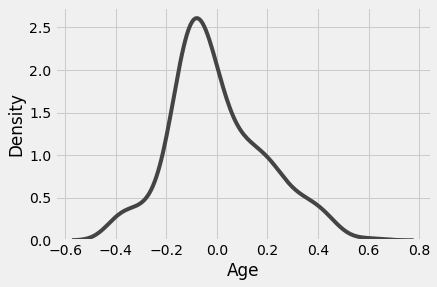

In [73]:
plt.style.use('fivethirtyeight')
sns.kdeplot(titanic_data_scaled['Age'],color='#444444')